# HW01: Intro to Text Data

In this assignment, we will explore how to load a text classification dataset (AG's news, originally posted [here](http://groups.di.unipi.it/~gulli/AG_corpus_of_news_articles.html)), how we can preprocess the data and extract useful information from a real-world dataset. First, we have to download the data; we only download a subset of the data with four classes.

In [1]:
#!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv

## Inspect Data

In [2]:
import pandas as pd
df = pd.read_csv("train.csv", header=None)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       120000 non-null  int64 
 1   1       120000 non-null  object
 2   2       120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


,0,1,2
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


Let's make the data more human readable by adding a header and replacing labels

In [3]:
df.columns = ["label", "title", "lead"]
label_map = {1:"world", 2:"sport", 3:"business", 4:"sci/tech"}
def replace_label(x):
	return label_map[x]
df["label"] = df["label"].apply(replace_label) 

In [4]:
df.head()

,label,title,lead
0,business,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [5]:
# TODO implement a new column text which contains the lowercased title and lead (concatenated with space)
df["text"] =  df['title'].str.lower() + ' ' + df['lead'].str.lower()

In [6]:
# TODO print the number of documents for each label
df['label'].value_counts()

business    30000
sci/tech    30000
sport       30000
world       30000
Name: label, dtype: int64

## Document Length

In [7]:
# TODO create a new column with the number of non-stop words in each text
# TODO plot the average number of non-stop words per label 
import spacy
from spacy.lang.en import stop_words
nlp = spacy.load('en_core_web_sm')

stopwords = stop_words.STOP_WORDS

In [8]:
# sample 5% of the dataset
dfs = df.sample(frac=.05) 

In [9]:
# Define a function to count non-stop words
def count_non_stop_words(text):
    doc = nlp(text)
    non_stop_words = [token.text for token in doc if token not in stopwords]
    return len(non_stop_words)

# Add a new column with the number of non-stop words in each text
dfs['non_stop_words'] = dfs['text'].apply(count_non_stop_words)

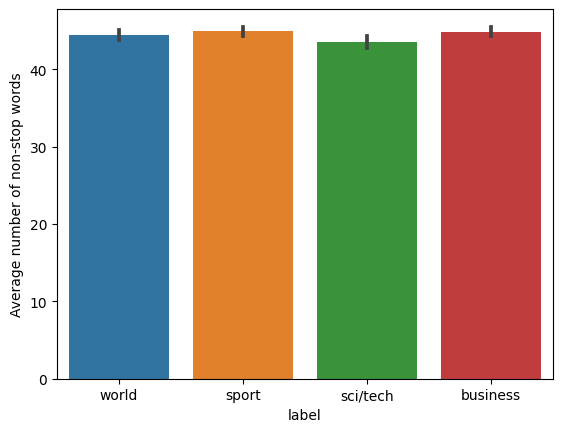

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(data=dfs, x="label", y="non_stop_words")
ax.set(xlabel='label', ylabel='Average number of non-stop words')
plt.show()

## Word Frequency 

Let's implement a keyword search (similar to the baker-bloom economic uncertainty) and compute how often some given keywords ("play", "tax", "blackberry", "israel") and numbers appear in the different classes in our data

In [11]:
import re
keywords = ["play", "tax", "blackberry", "israel"]
for keyword in keywords:
    #TODO implement a regex pattern for keyword
    x = keyword
    pattern = re.compile(r'(\b){}[a-z]*'.format(keyword))
    def count_keyword_frequencies(x):
        #TODO implement a function which counts how often a pattern appears in a text
        num_occurrences = len(re.findall(pattern, x))
        return num_occurrences
    # Now, we can print how often a keyword appears in the data
    print(keyword, df["text"].apply(count_keyword_frequencies).sum())
    # and we want to find out how often the keyword appears withhin each class
    for label in df["label"].unique():
        print ("label:", label,", keyword:", keyword, 
               ", occurences:" , df.apply(lambda row: count_keyword_frequencies(row.text) if row.label == label else None, axis=1).sum())
        #TODO print how often the keyword appears in this class
    print("*" * 100)

play 7670
label: business , keyword: play , occurences: 321.0
label: sci/tech , keyword: play , occurences: 1541.0
label: sport , keyword: play , occurences: 5480.0
label: world , keyword: play , occurences: 328.0
****************************************************************************************************
tax 1537
label: business , keyword: tax , occurences: 1185.0
label: sci/tech , keyword: tax , occurences: 93.0
label: sport , keyword: tax , occurences: 31.0
label: world , keyword: tax , occurences: 228.0
****************************************************************************************************
blackberry 234
label: business , keyword: blackberry , occurences: 44.0
label: sci/tech , keyword: blackberry , occurences: 190.0
label: sport , keyword: blackberry , occurences: 0.0
label: world , keyword: blackberry , occurences: 0.0
****************************************************************************************************
israel 3572
label: business , keyword: is

As a last exercise, we re-use the fuzzy keyword search implemented above and plot the total number of occurrences of "tax" (and it's variations, e.g. taxation, taxes etc.) for each class in the dataset. Hint: have a look at the [pandas bar plot with group by](https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot)

In [12]:
import matplotlib.pyplot as plt

keyword = "tax"
pattern = re.compile(r'(\b){}[a-z]*'.format(keyword))

def count_keyword_frequencies(x):
    #TODO implement a function which counts the total number of the word "tax" (and other fuzzy matches of tax) appearing in a given text
    num_occurrences = len(re.findall(pattern, x))
    return num_occurrences
df["counts"] = df["text"].apply(count_keyword_frequencies)


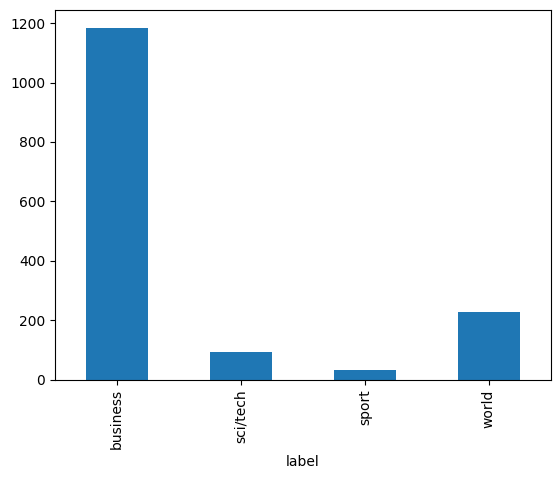

In [13]:
#TODO create a bar plot for the wordcounts of "tax" for each class in the dataset
df.groupby('label')['counts'].sum().plot(kind='bar')
plt.show()

In [14]:
import os

os.system('jupyter nbconvert --to html homework_01.ipynb')

1

In [15]:
!open homework_01.html

'open' is not recognized as an internal or external command,
operable program or batch file.
